In [10]:
import os
import sys
sys.path.append('Desktop/Technology%20Reply/Projects/Python%20Analysis/SP500STOCK')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_style('darkgrid')

In [2]:
        aapl = pd.read_csv('AAPL.csv')
        # Explore data of Apple stock

In [3]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


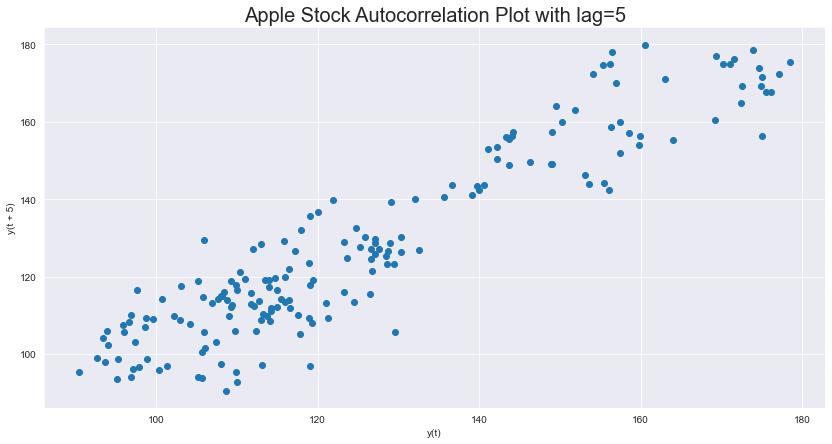

In [4]:
    plt.figure(figsize=(14,7)) #misure of plot
    pd.plotting.lag_plot(aapl['Close'], lag=5) #lag(time between two data acquisition)
    plt.title("Apple Stock Autocorrelation Plot with lag=5", size=20)
    plt.show()

<AxesSubplot:>

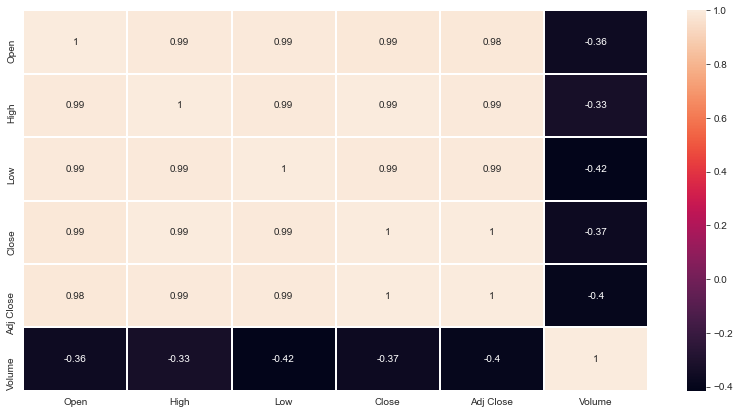

In [5]:
plt.figure(figsize=(14,7))
sns.heatmap(aapl.corr(), annot=True, linewidth=0.4) #sns is seaborn plot

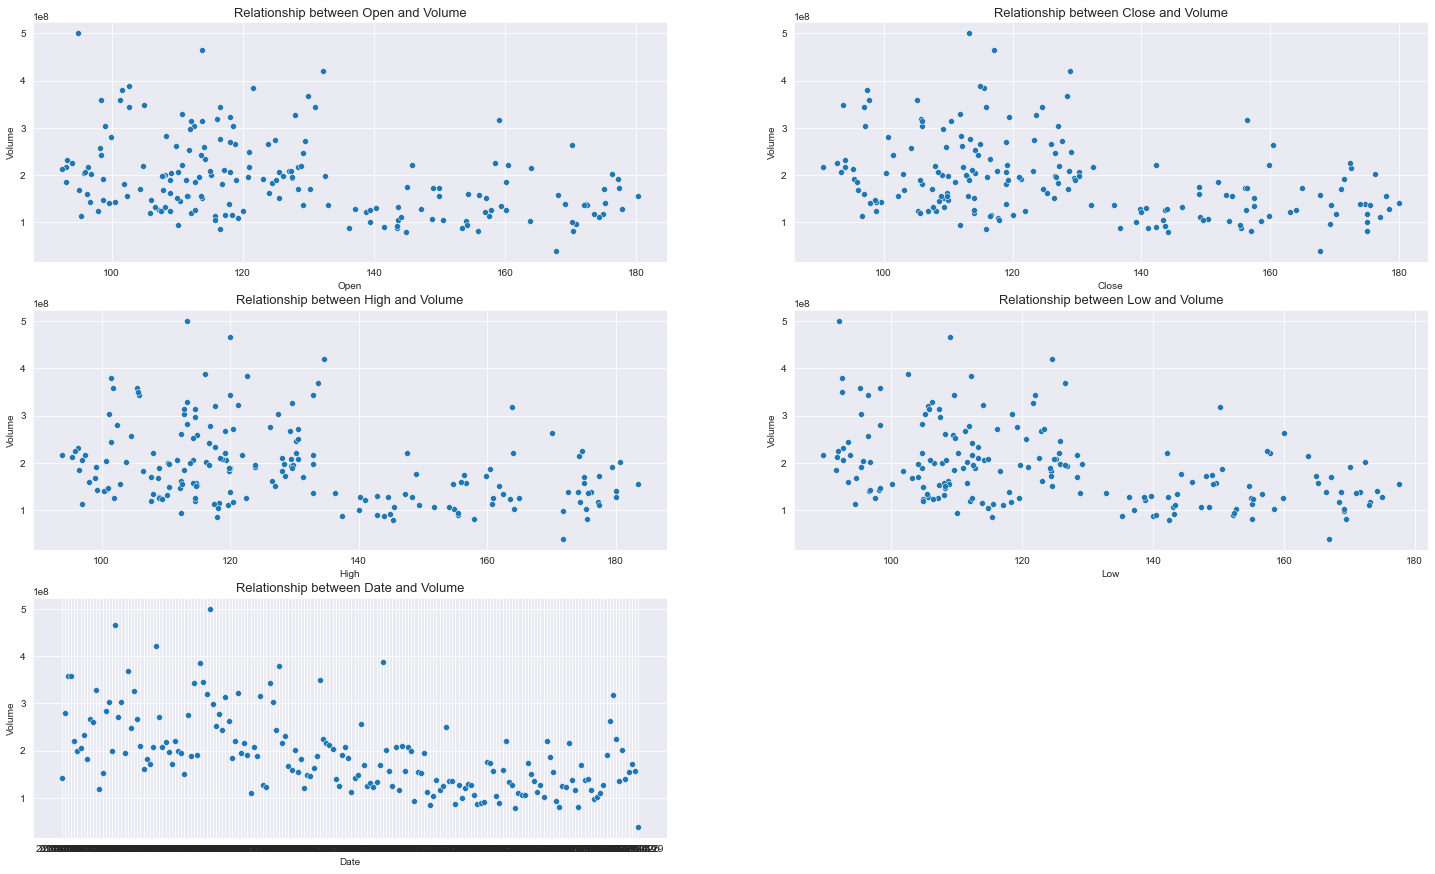

In [6]:
aapl_stock = ['Open', 'Close', 'High', 'Low', 'Date']

plt.figure(figsize=(25,15))

for feat in enumerate(aapl_stock):
    # enumerate() method adds counter to an iterable and returns the object
    plt.subplot(3,2, feat[0] + 1)
    sns.scatterplot(x=feat[1], y='Volume', data=aapl)
    plt.title('Relationship between {} and Volume'.format(feat[1]), size=13)
    # {} act as placeholder
    # For more info about the descending trend: https://www.ped30.com/2018/06/08/apple-trading-volume/

In [ ]:
# Simple Moving Average (MA)
aapl['close_short_ma'] = aapl.Close.rolling(50, min_periods=1).mean()

# Simple Moving Average 2
aapl['close_long_ma'] = aapl.Close.rolling(400, min_periods=1).mean()

# Exponential Moving Average (EMA) - Applies more weight to price changes
aapl['close_long_ema'] = aapl.Close.ewm(span=100, adjust=False).mean()

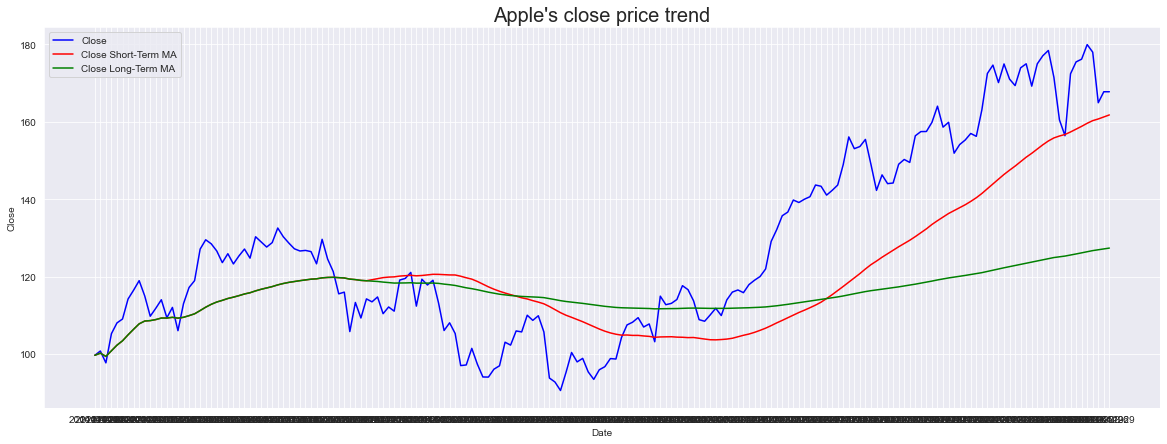

In [30]:
plt.figure(figsize=(20,7))

sns.lineplot(x='Date', y='Close', data=aapl, color='blue')
sns.lineplot(x='Date', y='close_short_ma', data=aapl, color='red')
sns.lineplot(x='Date', y='close_long_ma', data=aapl, color='green')

plt.legend(labels=['Close', 'Close Short-Term MA', 'Close Long-Term MA'])
plt.title('Apple\'s close price trend', size=20)
plt.show()

In [14]:
import plotly.graph_objects as go
candlestick = go.Candlestick(
                            x=aapl.Date,
                            open=aapl['Open'],
                            high=aapl['High'],
                            low=aapl['Low'],
                            close=aapl['Close']
                            )

fig = go.Figure(data=[candlestick])

# Add Exponential Moving Average
aapl['ema'] = aapl.Close.ewm(50, adjust=False).mean()
ema = go.Scatter(x=aapl.Date, y=aapl.ema, mode='lines', name='Apple EMA')
fig.add_trace(ema)


fig.update_layout(
    width=1400, height=1000,
    title="Apple Stocks 2013-2018",
    yaxis_title='AAPL Stock'
)

fig.show()

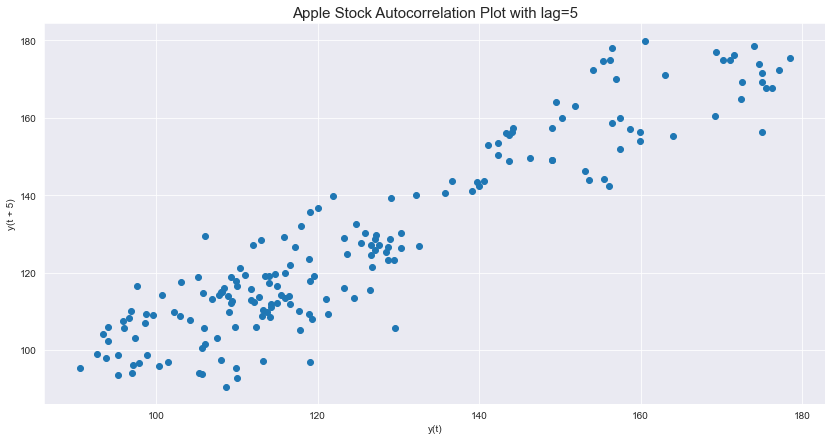